#### How to write imports Python Code with PEP8 Standards

From https://www.python.org/dev/peps/pep-0008/#imports

> *Imports should be grouped in the following order:  
1.Standard library imports.  
2.Related third party imports.    
3.Local application/library specific imports.   
You should put a blank line between each group of imports.*

In [31]:
#Standard Lib
from pathlib import Path, PurePath
import pickle
import warnings
warnings.filterwarnings('ignore')

#Sci Lib
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
from numpy.random import randn
import pandas as pd
from scipy import stats
from scipy.stats import shapiro
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from statsmodels.regression.linear_model import OLS

from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode
cf.go_offline()

# Styling 
%matplotlib inline
sns.set_style("whitegrid")

# Processus




In [20]:
with open('../indicators/EHI_V2_XB_AUM_TOTAL_1535470244067.pkl', "rb" ) as fi:
    aum_tot = pickle.load(fi)
aum_tot.head()

TRADE_DATE  Australia   Austria   Belgium    Brazil    Canada     Chile  \
0 1998-02-02   0.006657  0.000670  0.001104  0.001152  0.002446  0.000249   
1 1998-02-03   0.006612  0.000678  0.001105  0.001158  0.002442  0.000250   
2 1998-02-04   0.006585  0.000678  0.001104  0.001160  0.002435  0.000250   
3 1998-02-05   0.006563  0.000674  0.001106  0.001165  0.002437  0.000250   
4 1998-02-06   0.006527  0.000658  0.001108  0.001167  0.002445  0.000249   

      China  Colombia  Czech Republic      ...        Singapore  South Africa  \
0  0.000133       NaN        0.000033      ...         0.000761      0.000798   
1  0.000132       NaN        0.000033      ...         0.000765      0.000798   
2  0.000131       NaN        0.000033      ...         0.000761      0.000797   
3  0.000130       NaN        0.000033      ...         0.000767      0.000796   
4  0.000130       NaN        0.000033      ...         0.000776      0.000791   

      Spain    Sweden  Switzerland    Taiwan  Thailand    Turkey  \
0  0.005887  0.007156     0.018262  0.000369  0.000215  0.000126   
1  0.005884  0.007121     0.018301  0.000371  0.000213  0.000125   
2  0.005894  0.007105     0.018322  0.000371  0.000213  0.000125   
3  0.005904  0.007127     0.018419  0.000373  0.000213  0.000124   
4  0.005927  0.007141     0.018498  0.000384  0.000213  0.000123   

   United Kingdom  United States  
0        0.041357       0.017350  
1        0.041464       0.017313  
2        0.041524       0.017296  
3        0.041522       0.017263  
4        0.041455       0.017246  

[5 rows x 45 columns]

In [21]:
# Défini la colonne TRADE_DATE comme index, change le format en pd.datetime en meme temps et enlève 
#la colonne TRADE_DATE du DataFrame
aum_df = aum_tot.set_index(pd.to_datetime(aum_tot['TRADE_DATE'])).drop(['TRADE_DATE'], axis=1)
aum_df.head()

Australia   Austria   Belgium    Brazil    Canada     Chile  \
TRADE_DATE                                                                
1998-02-02   0.006657  0.000670  0.001104  0.001152  0.002446  0.000249   
1998-02-03   0.006612  0.000678  0.001105  0.001158  0.002442  0.000250   
1998-02-04   0.006585  0.000678  0.001104  0.001160  0.002435  0.000250   
1998-02-05   0.006563  0.000674  0.001106  0.001165  0.002437  0.000250   
1998-02-06   0.006527  0.000658  0.001108  0.001167  0.002445  0.000249   

               China  Colombia  Czech Republic   Denmark      ...        \
TRADE_DATE                                                    ...         
1998-02-02  0.000133       NaN        0.000033  0.001833      ...         
1998-02-03  0.000132       NaN        0.000033  0.001841      ...         
1998-02-04  0.000131       NaN        0.000033  0.001836      ...         
1998-02-05  0.000130       NaN        0.000033  0.001841      ...         
1998-02-06  0.000130       NaN        0.000033  0.001838      ...         

            Singapore  South Africa     Spain    Sweden  Switzerland  \
TRADE_DATE                                                             
1998-02-02   0.000761      0.000798  0.005887  0.007156     0.018262   
1998-02-03   0.000765      0.000798  0.005884  0.007121     0.018301   
1998-02-04   0.000761      0.000797  0.005894  0.007105     0.018322   
1998-02-05   0.000767      0.000796  0.005904  0.007127     0.018419   
1998-02-06   0.000776      0.000791  0.005927  0.007141     0.018498   

              Taiwan  Thailand    Turkey  United Kingdom  United States  
TRADE_DATE                                                               
1998-02-02  0.000369  0.000215  0.000126        0.041357       0.017350  
1998-02-03  0.000371  0.000213  0.000125        0.041464       0.017313  
1998-02-04  0.000371  0.000213  0.000125        0.041524       0.017296  
1998-02-05  0.000373  0.000213  0.000124        0.041522       0.017263  
1998-02-06  0.000384  0.000213  0.000123        0.041455       0.017246  

[5 rows x 44 columns]

In [22]:
# Test pour savoir si une année est présente et recupere la première date de cette année dans l'index

# PS: pour savoir si une date est présente dans l'index
# '2010' in aum_df.index
# Return True or False 

try:
    idx1 = aum_df.index.get_loc('1998').start
    startDate = aum_df.index.values[idx1]
    idx2 = aum_df.index.get_loc('2018').start
    endDate = aum_df.index.values[idx2]
except KeyError:
    raise

In [23]:
startDate, endDate

(numpy.datetime64('1998-02-02T00:00:00.000000000'),
 numpy.datetime64('2018-01-01T00:00:00.000000000'))

In [50]:
aum_tot_peri = aum_df.iloc[idx1:idx2]
aum_tot_peri.head()

Australia   Austria   Belgium    Brazil    Canada     Chile  \
TRADE_DATE                                                                
1998-02-02   0.006657  0.000670  0.001104  0.001152  0.002446  0.000249   
1998-02-03   0.006612  0.000678  0.001105  0.001158  0.002442  0.000250   
1998-02-04   0.006585  0.000678  0.001104  0.001160  0.002435  0.000250   
1998-02-05   0.006563  0.000674  0.001106  0.001165  0.002437  0.000250   
1998-02-06   0.006527  0.000658  0.001108  0.001167  0.002445  0.000249   

               China  Colombia  Czech Republic   Denmark      ...        \
TRADE_DATE                                                    ...         
1998-02-02  0.000133       NaN        0.000033  0.001833      ...         
1998-02-03  0.000132       NaN        0.000033  0.001841      ...         
1998-02-04  0.000131       NaN        0.000033  0.001836      ...         
1998-02-05  0.000130       NaN        0.000033  0.001841      ...         
1998-02-06  0.000130       NaN        0.000033  0.001838      ...         

            Singapore  South Africa     Spain    Sweden  Switzerland  \
TRADE_DATE                                                             
1998-02-02   0.000761      0.000798  0.005887  0.007156     0.018262   
1998-02-03   0.000765      0.000798  0.005884  0.007121     0.018301   
1998-02-04   0.000761      0.000797  0.005894  0.007105     0.018322   
1998-02-05   0.000767      0.000796  0.005904  0.007127     0.018419   
1998-02-06   0.000776      0.000791  0.005927  0.007141     0.018498   

              Taiwan  Thailand    Turkey  United Kingdom  United States  
TRADE_DATE                                                               
1998-02-02  0.000369  0.000215  0.000126        0.041357       0.017350  
1998-02-03  0.000371  0.000213  0.000125        0.041464       0.017313  
1998-02-04  0.000371  0.000213  0.000125        0.041524       0.017296  
1998-02-05  0.000373  0.000213  0.000124        0.041522       0.017263  
1998-02-06  0.000384  0.000213  0.000123        0.041455       0.017246  

[5 rows x 44 columns]

## Clean des data

In [57]:
delta=aum_tot_peri.loc['2016-04-29'] - aum_tot_peri.loc['2016-05-13']
#delta

In [52]:
aum_gap = aum_tot_peri.copy()

In [53]:
aum_gap.loc['2016-05-13':] = aum_gap.loc['2016-05-13':] + delta
aum_gap.loc['2016-04-29':'2016-05-13'] = np.nan

In [58]:
aum_gap['Singapore'].iplot()

In [25]:
aum_tot_us = aum_tot_peri['United States']
aum_tot_us.describe()

count    5195.000000
mean        0.043871
std         0.022467
min         0.016816
25%         0.028866
50%         0.035954
75%         0.058293
max         0.107602
Name: United States, dtype: float64

In [26]:
aum_tot_us.head()

TRADE_DATE
1998-02-02    0.017350
1998-02-03    0.017313
1998-02-04    0.017296
1998-02-05    0.017263
1998-02-06    0.017246
Name: United States, dtype: float64

In [46]:
aum_tot_us.iplot()

In [49]:
aum_tot_singapore=aum_tot_peri['Singapore']
#aum_tot_singapore.iplot()

## Rolling Z-Score

### ---------- Nico:

Note pour la suite: Autant faire une mini fonction de normalisation réutilisable par la suite, pour éviter de réécrire à chaque fois la même chose.  

Quelque chose du style:
```python
def rolling_zs(series, window):  
    calcul rolling_zscore  
    return series zscorer  
```

#### ----------- END Nico

In [27]:
k=260
aum_zscore = ((aum_gap - aum_gap.rolling(k).mean())/aum_gap.rolling(k).std()).dropna()

In [28]:
#aum_zscore

## Calcul des modalités à partir des parties entières

In [29]:
aum_zscore.head()

TRADE_DATE
1999-01-29    0.427728
1999-02-01    0.770837
1999-02-02    1.047961
1999-02-03    1.313713
1999-02-04    1.499588
Name: United States, dtype: float64

In [30]:
aum_zscore.round().describe()

count    4916.00000
mean        0.58930
std         1.51626
min        -7.00000
25%        -1.00000
50%         1.00000
75%         2.00000
max         8.00000
Name: United States, dtype: float64

In [31]:
aum_round = aum_zscore.round()

In [32]:
aum_round.value_counts().sort_index()

-7.0       7
-6.0       3
-5.0       3
-4.0      13
-3.0      84
-2.0     146
-1.0    1146
 0.0     795
 1.0    1069
 2.0    1390
 3.0     211
 4.0      31
 5.0       7
 6.0       2
 7.0       4
 8.0       5
Name: United States, dtype: int64

In [33]:
#aum_round.value_counts().sort_index().iplot()

## Utilisation de la fonction Cut

## Cut sur tous les intervalles 

### ---------- Nico:

Pour la fonction Cut, ne vous embettez pas à construire un IntervalIndex, cut le fait lui même.  
Il est donc possible de passer en argument une liste de valeurs

**Example:**

In [34]:
bins_ex = [-20, -2, -0.7, 0.7 , 2, 20]

In [35]:
pd.cut(aum_zscore,bins_ex).head()

TRADE_DATE
1999-01-29    (-0.7, 0.7]
1999-02-01     (0.7, 2.0]
1999-02-02     (0.7, 2.0]
1999-02-03     (0.7, 2.0]
1999-02-04     (0.7, 2.0]
Name: United States, dtype: category
Categories (5, interval[float64]): [(-20.0, -2.0] < (-2.0, -0.7] < (-0.7, 0.7] < (0.7, 2.0] < (2.0, 20.0]]

#### ----------- END Nico

In [35]:
bins=pd.IntervalIndex.from_tuples([(-8, -7), (-7, -6), (-6, -5),(-5,-4),(-4,-3),(-3,-2),(-2,-1),(-1,1),(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8)])

In [36]:
#bins

In [37]:
df=pd.cut(aum_zscore,bins)

In [38]:
df.head()

TRADE_DATE
1999-01-29    (-1, 1]
1999-02-01    (-1, 1]
1999-02-02     (1, 2]
1999-02-03     (1, 2]
1999-02-04     (1, 2]
Name: United States, dtype: category
Categories (15, interval[int64]): [(-8, -7] < (-7, -6] < (-6, -5] < (-5, -4] ... (4, 5] < (5, 6] < (6, 7] < (7, 8]]

In [39]:
df.value_counts().sort_index()

(-8, -7]       4
(-7, -6]       4
(-6, -5]       3
(-5, -4]       6
(-4, -3]      42
(-3, -2]      94
(-2, -1]     458
(-1, 1]     2114
(1, 2]      1389
(2, 3]       682
(3, 4]        87
(4, 5]        20
(5, 6]         3
(6, 7]         4
(7, 8]         5
Name: United States, dtype: int64

In [40]:
#df.index

In [41]:
#df.value_counts().sort_index().plot(figsize= (20,10))

In [42]:
df_test=df.value_counts()

In [43]:
#Test de Shapiro
alpha = 0.1
stat,p=stats.shapiro(df_test)
if p > alpha :
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


## Cut sur 6 niveaux centrés autour de 0

In [44]:
bins2=pd.IntervalIndex.from_tuples([(-8, -2), (-2, -1), (-1, 0),(0,1),(1,2),(2,8)])

In [45]:
df2=pd.cut(aum_zscore,bins2)

In [46]:
df2.value_counts().sort_index()

(-8, -2]     153
(-2, -1]     458
(-1, 0]     1284
(0, 1]       830
(1, 2]      1389
(2, 8]       801
Name: United States, dtype: int64

In [47]:
#df2.value_counts().sort_index().plot(figsize= (10,6))

## Cut sur 7 niveaux avec un intervalle centré autour de 0

In [48]:
bins3=pd.IntervalIndex.from_tuples([(-8, -2.5), (-2.5, -1.5), (-1.5, -0.5),(-0.5,0.5),(0.5,1.5),(1.5,2.5),(2.5,8)])

In [49]:
df3=pd.cut(aum_zscore,bins3)

In [50]:
df3.value_counts().sort_index()

(-8.0, -2.5]     110
(-2.5, -1.5]     146
(-1.5, -0.5]    1146
(-0.5, 0.5]      795
(0.5, 1.5]      1069
(1.5, 2.5]      1390
(2.5, 8.0]       259
Name: United States, dtype: int64

In [51]:
#df3.value_counts().sort_index().plot(figsize= (10,6))

# Harmonisation données AUM et MSCI

## Suppression de certaines données et sélection de 1998 à 2018 pour le MSCI

In [52]:
with open('../data/MSCI/MSCI_TR_LOCAL.pkl', "rb") as fi:
    df_msci = pickle.load(fi)
df_msci_us = df_msci['GDDLUS Index']

In [53]:
msci_gap = df_msci_us.copy()

In [54]:
#Suppression des mêmes dates pour MSCI (sfhit AUM)

In [55]:
msci_gap.drop([msci_gap.index.values[msci_gap.index.get_loc('2016-05-02')],msci_gap.index.values[msci_gap.index.get_loc('2016-05-03')],msci_gap.index.values[msci_gap.index.get_loc('2016-05-04')],msci_gap.index.values[msci_gap.index.get_loc('2016-05-05')],msci_gap.index.values[msci_gap.index.get_loc('2016-05-06')],msci_gap.index.values[msci_gap.index.get_loc('2016-05-09')],msci_gap.index.values[msci_gap.index.get_loc('2016-05-10')],msci_gap.index.values[msci_gap.index.get_loc('2016-05-11')],msci_gap.index.values[msci_gap.index.get_loc('2016-05-12')],msci_gap.index.values[msci_gap.index.get_loc('2016-05-13')],msci_gap.index.values[msci_gap.index.get_loc('2016-05-25')]],inplace=True)


In [56]:
msci_gap.drop([msci_gap.index.values[msci_gap.index.get_loc('2016-05-16')],msci_gap.index.values[msci_gap.index.get_loc('2016-05-27')],msci_gap.index.values[msci_gap.index.get_loc('2016-05-17')],msci_gap.index.values[msci_gap.index.get_loc('2016-05-18')],msci_gap.index.values[msci_gap.index.get_loc('2016-05-19')],msci_gap.index.values[msci_gap.index.get_loc('2016-05-20')],msci_gap.index.values[msci_gap.index.get_loc('2016-05-23')],msci_gap.index.values[msci_gap.index.get_loc('2016-05-24')],msci_gap.index.values[msci_gap.index.get_loc('2016-05-26')]],inplace=True)


In [57]:
try:
    idx1 = msci_gap.index.get_loc('1998').start
    startDate = msci_gap.index.values[idx1]
    idx2 = msci_gap.index.get_loc('2018').start
    endDate = msci_gap.index.values[idx2]
except KeyError:
    raise

In [58]:
startDate, endDate

(numpy.datetime64('1998-01-30T00:00:00.000000000'),
 numpy.datetime64('2018-01-01T00:00:00.000000000'))

In [59]:
msci_def = msci_gap.iloc[idx1:idx2]

In [60]:
msci_def.count()

4948

In [61]:
aum_zscore.count()

4916

## Harmonisation des données

In [62]:
# Pour harmoniser les données, on fait une jointure pour récupérer les indices communs

In [63]:
data=pd.DataFrame(aum_zscore).rename(columns={'United States':'AUM_ZScore'}).join(pd.DataFrame(msci_def).rename(columns={'GDDLUS Index':'MSCI'}))

In [64]:
data.head()

AUM_ZScore     MSCI
TRADE_DATE                     
1999-01-29       0.428 3705.306
1999-02-01       0.771 3682.780
1999-02-02       1.048 3648.612
1999-02-03       1.314 3679.043
1999-02-04       1.500 3609.831

## Sélection du niveau 0 : [-0.5,0.5] sur les données AUM Zscore

In [65]:
#data['AUM_ZScore'] < 0.5

In [66]:
data.head()

AUM_ZScore     MSCI
TRADE_DATE                     
1999-01-29       0.428 3705.306
1999-02-01       0.771 3682.780
1999-02-02       1.048 3648.612
1999-02-03       1.314 3679.043
1999-02-04       1.500 3609.831

In [67]:
level0=data[(data['AUM_ZScore']<0.5)&(data['AUM_ZScore']>-0.5)]

In [68]:
level0.count()

AUM_ZScore    795
MSCI          795
dtype: int64

In [69]:
level0.head()

AUM_ZScore     MSCI
TRADE_DATE                     
1999-01-29       0.428 3705.306
1999-08-06       0.500 3790.536
1999-08-09       0.459 3776.224
1999-08-10       0.410 3733.605
1999-08-11       0.389 3792.843

## Premier Scatter Point niveau 0

In [70]:
colors = np.random.rand(795)


Coefficients: 
 [1080.55936405]
Mean squared error: 34375378.83


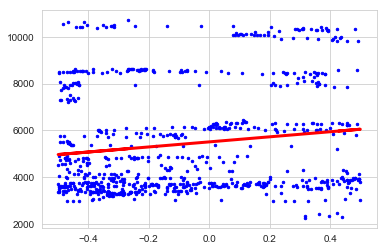

In [71]:
plt.scatter(level0['AUM_ZScore'],level0['MSCI'],alpha=1,s=6,c='blue')

regr1 = linear_model.LinearRegression()
regr1.fit(level0['AUM_ZScore'][:,np.newaxis], level0['MSCI'])

plt.plot(level0['AUM_ZScore'], regr1.predict(level0['AUM_ZScore'][:,np.newaxis]), color='red', linewidth=3)
print('Coefficients: \n', regr1.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(level0['AUM_ZScore'],level0['MSCI']))

In [72]:
# On constate qu'il faut harmoniser les données

## Rolling Zscore sur les MSCI pour harmoniser le scatter point Niveau 0

In [73]:
msci_gap=pd.DataFrame(msci_def)

In [74]:
k=260
msci_zscore = ((msci_gap - msci_gap.rolling(k).mean())/msci_gap.rolling(k).std()).dropna()

In [75]:
msci_zscore.rename(columns={'GDDLUS Index':'MSCI'},inplace=True)

In [76]:
msci_zscore.head()

MSCI
Date            
1999-12-14 1.438
1999-12-15 1.631
1999-12-16 1.740
1999-12-17 1.786
1999-12-20 1.806

In [77]:
data_zscore=pd.DataFrame(aum_zscore).rename(columns={'United States':'AUM_ZScore'}).join(msci_zscore).dropna()

In [78]:
data_zscore.head()

AUM_ZScore  MSCI
TRADE_DATE                  
1999-12-14      -0.887 1.438
1999-12-15      -0.862 1.631
1999-12-16      -0.880 1.740
1999-12-17      -0.920 1.786
1999-12-20      -0.971 1.806

In [79]:
level0_zscore=data_zscore[(data_zscore['AUM_ZScore']<0.5)&(data_zscore['AUM_ZScore']>-0.5)]

In [80]:
level0_zscore.head()

AUM_ZScore  MSCI
TRADE_DATE                  
2000-01-05      -0.448 1.496
2000-01-06      -0.235 1.300
2000-01-07       0.065 2.038
2000-01-10       0.309 2.289
2000-01-11       0.451 1.958

In [81]:
level0_zscore.corr()

AUM_ZScore  MSCI
AUM_ZScore       1.000 0.102
MSCI             0.102 1.000

Coefficients: 
 [0.35903715]
Mean squared error: 2.77


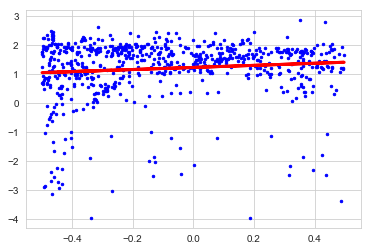

In [82]:
plt.scatter(level0_zscore['AUM_ZScore'],level0_zscore['MSCI'],alpha=1,s=6,c='blue')

regr1 = linear_model.LinearRegression()
regr1.fit(level0_zscore['AUM_ZScore'][:,np.newaxis], level0_zscore['MSCI'])

plt.plot(level0_zscore['AUM_ZScore'], regr1.predict(level0_zscore['AUM_ZScore'][:,np.newaxis]), color='red', linewidth=3)
print('Coefficients: \n', regr1.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(level0_zscore['AUM_ZScore'],level0_zscore['MSCI']))

## Tests sur d'autres niveaux

## Niveau 1 : [0.5,1.5]

In [83]:
level1_zscore=data_zscore[(data_zscore['AUM_ZScore']<1.5)&(data_zscore['AUM_ZScore']>0.5)]

Coefficients: 
 [-0.85163107]
Mean squared error: 2.13


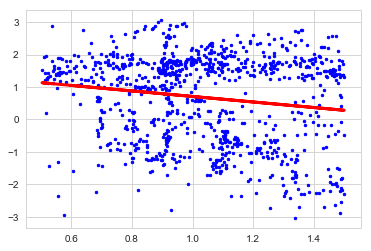

In [84]:
plt.scatter(level1_zscore['AUM_ZScore'],level1_zscore['MSCI'],alpha=1,s=6,c='blue')

regr1 = linear_model.LinearRegression()
regr1.fit(level1_zscore['AUM_ZScore'][:,np.newaxis], level1_zscore['MSCI'])

plt.plot(level1_zscore['AUM_ZScore'], regr1.predict(level1_zscore['AUM_ZScore'][:,np.newaxis]), color='red', linewidth=3)
print('Coefficients: \n', regr1.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(level1_zscore['AUM_ZScore'],level1_zscore['MSCI']))

## Niveau -1 : [-1.5,0.5]

In [85]:
levelm1_zscore=data_zscore[(data_zscore['AUM_ZScore']<0.5)&(data_zscore['AUM_ZScore']>-1.5)]

Coefficients: 
 [0.49123324]
Mean squared error: 3.79


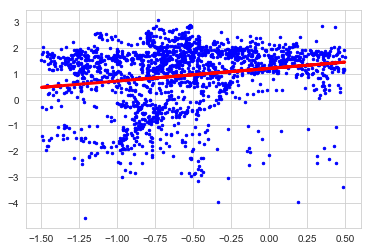

In [86]:
plt.scatter(levelm1_zscore['AUM_ZScore'],levelm1_zscore['MSCI'],alpha=1,s=6,c='blue')

regr1 = linear_model.LinearRegression()
regr1.fit(levelm1_zscore['AUM_ZScore'][:,np.newaxis], levelm1_zscore['MSCI'])

plt.plot(levelm1_zscore['AUM_ZScore'], regr1.predict(levelm1_zscore['AUM_ZScore'][:,np.newaxis]), color='red', linewidth=3)
print('Coefficients: \n', regr1.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(levelm1_zscore['AUM_ZScore'],levelm1_zscore['MSCI']))

## Régression linéaire par morceaux Niveau 0

## Premiers tests statistiques sur le niveau 0

In [87]:
model = OLS(level0_zscore['MSCI'].values,level0_zscore['AUM_ZScore'].values)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     21.90
Date:                Thu, 29 Nov 2018   Prob (F-statistic):           3.43e-06
Time:                        13:38:45   Log-Likelihood:                -1339.9
No. Observations:                 719   AIC:                             2682.
Df Residuals:                     718   BIC:                             2686.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.8742      0.187     -4.680      0.000      -1.241      -0.507
==============================================================================
Omnibus:                      310.230   Durbin-Watson:                   0.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1219.999
Skew:                          -2.047   Prob(JB):                    1.20e-265
Kurtosis:                       7.895   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
# Régression linéaire par morceaux pour le niveau 0

In [89]:
model = DecisionTreeRegressor(min_samples_leaf=10, max_depth=3)
model.fit(level0_zscore, level0_zscore['MSCI'])
yp = model.predict(level0_zscore)

Text(0.5,1,'Arbre de décision sur un nuage linéaire par morceaux\nR2=0.969564')

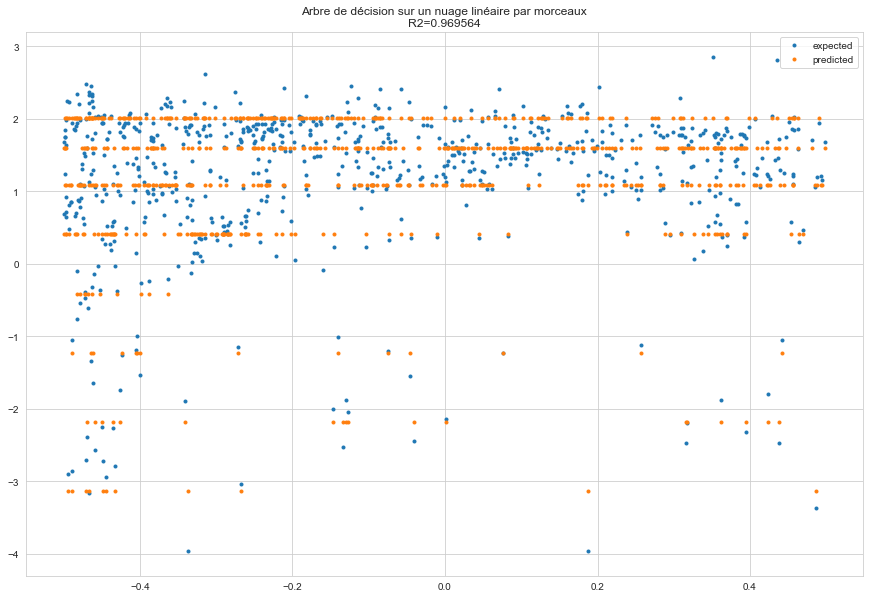

In [90]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(level0_zscore['AUM_ZScore'], level0_zscore['MSCI'], ".", label="expected")
ax.plot(level0_zscore['AUM_ZScore'], yp, ".", label="predicted")
ax.legend()
r2 = r2_score(level0_zscore['MSCI'], model.predict(level0_zscore))
ax.set_title("Arbre de décision sur un nuage linéaire par morceaux\nR2=%f" % r2)

## Cut sur les exemples extrêmes

## Sélection niveau -3 : [-8,-2.5]

In [91]:
levelm3_zscore=data_zscore[(data_zscore['AUM_ZScore']<-2.5)&(data_zscore['AUM_ZScore']>-8)]

In [92]:
levelm3_zscore.head()

AUM_ZScore  MSCI
TRADE_DATE                  
2006-05-02      -4.070 1.738
2006-05-03      -5.780 1.625
2006-05-04      -6.780 1.712
2006-05-05      -7.220 1.986
2006-05-08      -7.323 1.955

Coefficients: 
 [-0.95562214]
Mean squared error: 10.79


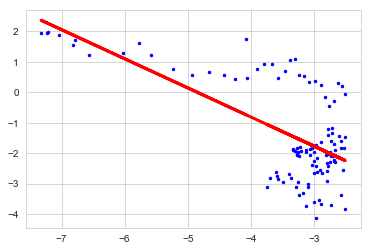

In [93]:
plt.scatter(levelm3_zscore['AUM_ZScore'],levelm3_zscore['MSCI'],alpha=1,s=6,c='blue')

regr1 = linear_model.LinearRegression()
regr1.fit(levelm3_zscore['AUM_ZScore'][:,np.newaxis], levelm3_zscore['MSCI'])

plt.plot(levelm3_zscore['AUM_ZScore'], regr1.predict(levelm3_zscore['AUM_ZScore'][:,np.newaxis]), color='red', linewidth=3)
print('Coefficients: \n', regr1.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(levelm3_zscore['AUM_ZScore'],levelm3_zscore['MSCI']))

## Sélection niveau 3 [2.5,8]

In [94]:
level3_zscore=data_zscore[(data_zscore['AUM_ZScore']<8)&(data_zscore['AUM_ZScore']>2.5)]

Coefficients: 
 [0.25954322]
Mean squared error: 7.44


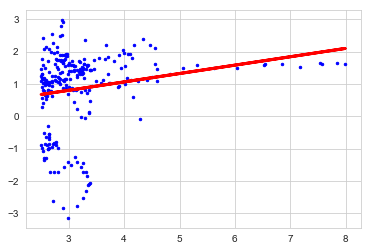

In [95]:
plt.scatter(level3_zscore['AUM_ZScore'],level3_zscore['MSCI'],alpha=1,s=6,c='blue')

regr1 = linear_model.LinearRegression()
regr1.fit(level3_zscore['AUM_ZScore'][:,np.newaxis], level3_zscore['MSCI'])

plt.plot(level3_zscore['AUM_ZScore'], regr1.predict(level3_zscore['AUM_ZScore'][:,np.newaxis]), color='red', linewidth=3)
print('Coefficients: \n', regr1.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(level3_zscore['AUM_ZScore'],level3_zscore['MSCI']))

## Plot MSCI et AUM

In [96]:
#data_zscore.iplot()